<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/heartparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
df= pd.read_csv("/gdrive/My Drive/df1_heart.csv")

In [37]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Age,SepsisLabel
0,0,99.0,100.0,37.0,120.0,71.0,60.0,69.66,0
1,1,97.5,100.0,37.0,120.0,78.0,60.0,69.66,0
2,2,96.0,100.0,37.0,120.0,70.0,60.0,69.66,0
3,3,100.0,99.0,37.0,120.0,75.0,60.0,69.66,0
4,4,102.0,100.0,36.0,120.0,74.0,60.0,69.66,0


In [38]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [39]:
df.SepsisLabel.value_counts()

0    973683
1     20124
Name: SepsisLabel, dtype: int64

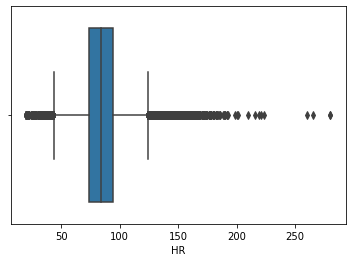

In [40]:
sns.boxplot(df['HR'])

In [41]:
print(df['HR'].quantile(0.10))
print(df['HR'].quantile(0.90))

64.0
106.0


In [42]:
df["HR"] = np.where(df["HR"] <64.0, 64.0,df['HR'])
df["HR"] = np.where(df["HR"] >106.0, 106.0,df['HR'])
print(df['HR'].skew())

0.11335757383538864


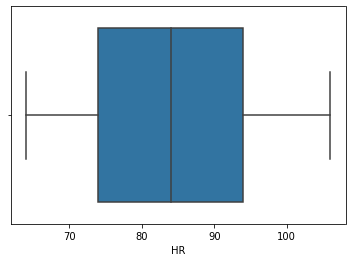

In [43]:
sns.boxplot(df['HR'])

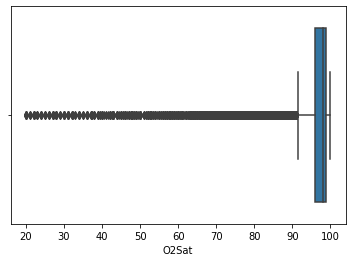

In [44]:
sns.boxplot(df['O2Sat'])

In [45]:
print(df['O2Sat'].quantile(0.10))
print(df['O2Sat'].quantile(0.90))

94.0
100.0


In [46]:
df["O2Sat"] = np.where(df["O2Sat"] <94.0, 94.0,df['O2Sat'])
df["O2Sat"] = np.where(df["O2Sat"] >100.0, 100.0,df['O2Sat'])
print(df['O2Sat'].skew())

-0.4277130710644394


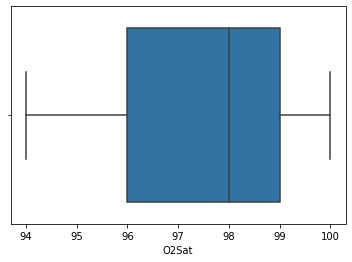

In [47]:
sns.boxplot(df['O2Sat'])

In [48]:
print(df['SBP'].quantile(0.10))
print(df['SBP'].quantile(0.90))

97.0
150.0


In [49]:
df["SBP"] = np.where(df["SBP"] <97.0, 97.0,df['SBP'])
df["SBP"] = np.where(df["SBP"] >150.0, 150.0,df['SBP'])
print(df['SBP'].skew())

0.2804638587639356


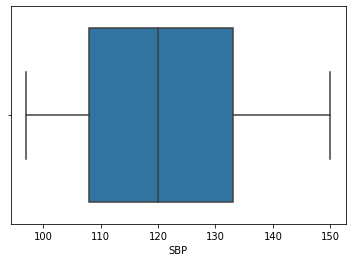

In [50]:
sns.boxplot(df['SBP'])

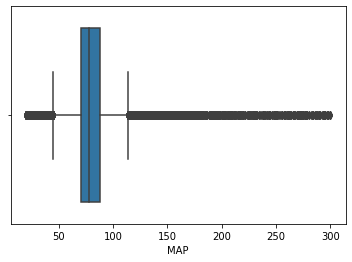

In [51]:
sns.boxplot(df['MAP'])

In [52]:
print(df['MAP'].quantile(0.10))
print(df['MAP'].quantile(0.90))

63.0
99.0


In [53]:
df["MAP"] = np.where(df["MAP"] <63.0, 63.0,df['MAP'])
df["MAP"] = np.where(df["MAP"] >99.0, 99.0,df['MAP'])
print(df['MAP'].skew())

0.2901440610172552


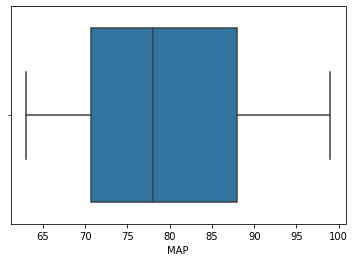

In [54]:
sns.boxplot(df['MAP'])

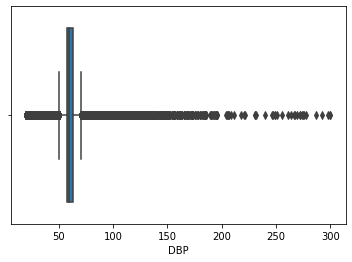

In [55]:
sns.boxplot(df['DBP'])

In [56]:
print(df['DBP'].quantile(0.10))
print(df['DBP'].quantile(0.90))

50.0
74.0


In [57]:
df["DBP"] = np.where(df["DBP"] <50.0, 50.0,df['DBP'])
df["DBP"] = np.where(df["DBP"] >74.0, 74.0,df['DBP'])
print(df['DBP'].skew())

0.44949881448858164


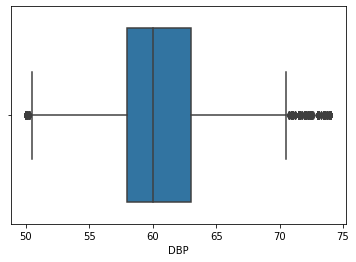

In [58]:
sns.boxplot(df['DBP'])

In [59]:
print(df.SepsisLabel.value_counts())

0    973683
1     20124
Name: SepsisLabel, dtype: int64


In [60]:
X=np.array(df.drop(['SepsisLabel'],1))
y=np.array(df['SepsisLabel'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (993807, 7)
Shape of y: (993807,)


In [61]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (695664, 7)
Number transactions y_train dataset:  (695664,)
Number transactions X_test dataset:  (298143, 7)
Number transactions y_test dataset:  (298143,)


In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 14291
Before OverSampling, counts of label '0': 681373 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1362746, 7)
After OverSampling, the shape of train_y: (1362746,) 

After OverSampling, counts of label '1': 681373
After OverSampling, counts of label '0': 681373


In [63]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

sm = SMOTE(random_state=2)
X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res==0)))

Before OverSampling, counts of label '1': 5833
Before OverSampling, counts of label '0': 292310 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of test_X: (584620, 7)
After OverSampling, the shape of test_y: (584620,) 

After OverSampling, counts of label '1': 292310
After OverSampling, counts of label '0': 292310


In [64]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [65]:
sm_test = SMOTE(random_state=12)
x_test_res, y_test_res = sm_test.fit_sample(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [66]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [67]:
from sklearn.metrics import recall_score, classification_report, accuracy_score
print ('Validation Results')
print(clf_rf.score(x_test_res, y_test_res))
print (recall_score(y_test_res, clf_rf.predict(x_test_res)))
print(classification_report(y_test_res,clf_rf.predict(x_test_res)))
print(accuracy_score(y_test_res,clf_rf.predict(x_test_res)))

Validation Results
0.9463377920700626
0.9013239369162875
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    292310
           1       0.99      0.90      0.94    292310

    accuracy                           0.95    584620
   macro avg       0.95      0.95      0.95    584620
weighted avg       0.95      0.95      0.95    584620

0.9463377920700626


OSError: ignored

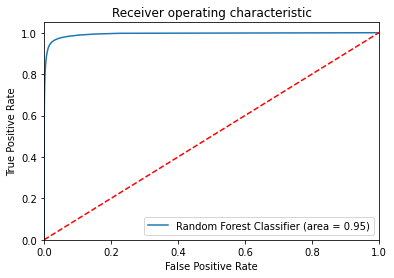

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test_res, clf_rf.predict(x_test_res))
fpr, tpr, thresholds = roc_curve(y_test_res, clf_rf.predict_proba(x_test_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

[[289782   2528]
 [ 28844 263466]]


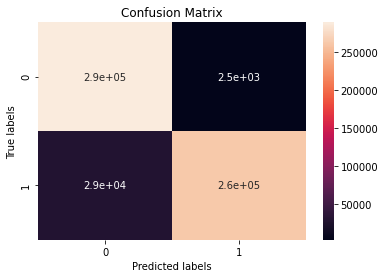

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test_res, clf_rf.predict(x_test_res))
print(confusion_matrix_rf)
ax= plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [69]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_res,x_train_res)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.669635
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.034       
Dependent Variable: y                AIC:              1825098.0187
Date:               2020-07-29 17:13 BIC:              1825182.8938
No. Observations:   1362746          Log-Likelihood:   -9.1254e+05 
Df Model:           6                LL-Null:          -9.4458e+05 
Df Residuals:       1362739          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     4.0000                                         
----------------------------------------------------------------------
       Coef.     Std.Err.        z        P>|z|      [0.025     0.975]
----------------------------------------------------------------------
x1     0.0202      0.0001     146.8349    0.0000     0.0199     0.0205
x2    -0.1244      0.0008    

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [71]:
logreg = LogisticRegression()
logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred = logreg.predict(x_test_res)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_res, y_test_res)))

Accuracy of logistic regression classifier on test set: 0.74


[[221497  70813]
 [ 78994 213316]]


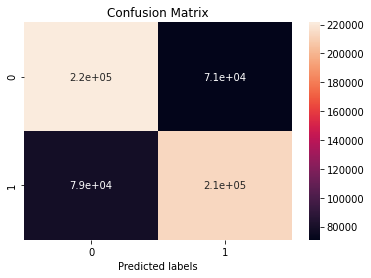

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_res, y_pred)
print(confusion_matrix)
ax_1= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax_1); #annot=True to annotate cells

# labels, title and ticks
ax_1.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax_1.set_title('Confusion Matrix'); 
ax_1.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75    292310
           1       0.75      0.73      0.74    292310

    accuracy                           0.74    584620
   macro avg       0.74      0.74      0.74    584620
weighted avg       0.74      0.74      0.74    584620



OSError: ignored

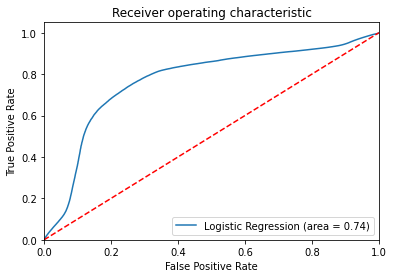

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_res, logreg.predict(x_test_res))
fpr, tpr, thresholds = roc_curve(y_test_res, logreg.predict_proba(x_test_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [76]:
from sklearn import svm # support vector Machine
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # K-NN
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import RandomForestClassifier # random Forest
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

In [78]:
from sklearn.pipeline import make_pipeline

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [80]:
scaler = StandardScaler()
x_train_res = scaler.fit_transform(x_train_res)
x_test_res = scaler.transform(x_test_res)

In [81]:
from sklearn import linear_model
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()

In [82]:
models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]

In [83]:
def get_cv_scores(model):
    scores = cross_val_score(model, x_train_res, y_train_res, cv=5, scoring='roc_auc')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [84]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train_res, y_train_res)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 33.5min finished


Best Score:  0.7804247350064463
Best Params:  {'C': 0.0001, 'class_weight': {1: 0.4, 0: 0.6}, 'penalty': 'l1', 'solver': 'saga'}


In [85]:
logistic = linear_model.LogisticRegression(C=1, class_weight={1:0.6, 0:0.4}, penalty='l1', solver='saga')

In [86]:
logistic

LogisticRegression(C=1, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
get_cv_scores(logistic)

CV Mean:  0.7648833689038865
STD:  0.00021324986145270986




In [88]:
predictions = logistic.fit(x_train_res, y_train_res).predict_proba(x_test_res)

In [89]:
predictions

array([[0.50085037, 0.49914963],
       [0.56861016, 0.43138984],
       [0.51875539, 0.48124461],
       ...,
       [0.35349666, 0.64650334],
       [0.39100413, 0.60899587],
       [0.33644634, 0.66355366]])

In [90]:
x_test_res.tofile('/gdrive/My Drive/test.csv', sep ='|')

In [93]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100]

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           class_weight=class_weight,
                           eta0=eta0)

random = RandomizedSearchCV(estimator=sgd, param_distributions=param_distributions, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter=1000)
random_result = random.fit(x_train_res, y_train_res)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 59.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 87.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 126.8min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 180.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 230.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 289.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 349.2min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 349.3min finished


Best Score:  0.7913589029428186
Best Params:  {'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 1, 'class_weight': {1: 0.6, 0: 0.4}, 'alpha': 0.1}


In [100]:
sgd = linear_model.SGDClassifier(alpha=0.1,
                                 class_weight={1:0.6, 0:0.4},
                                 eta0=1,
                                 learning_rate='optimal',
                                 loss='hinge',
                                 penalty='l2')
get_cv_scores(sgd)

CV Mean:  0.7913613424801718
STD:  0.0005161406431453825




In [101]:
predictions_2 = sgd.fit(x_train_res, y_train_res).predict_proba(x_test_res)

AttributeError: ignored

In [102]:
predictions_2

array([[0.47822068, 0.52177932],
       [0.48200267, 0.51799733],
       [0.48235831, 0.51764169],
       ...,
       [0.47227549, 0.52772451],
       [0.47988712, 0.52011288],
       [0.47518902, 0.52481098]])